In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']    # 设置可显示中文，不出现乱码,字体为黑体
plt.rcParams['axes.unicode_minus'] = False 

In [5]:
plt.figure(figsize=(10, 6))  # 设置画布大小
df = pd.read_excel('D:\MyPython\AnalysisAndShow\BI\乳腺癌诊断数据集.xlsx')

<Figure size 1000x600 with 0 Axes>

In [6]:
df

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,半径_最差值,质地.2,周长.2,面积.2,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
from sklearn.cluster import KMeans

In [8]:
km=KMeans(n_clusters=3).fit(df[['周长','紧凑型']])

D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
km2=KMeans(n_clusters=2).fit(df[['周长','紧凑型']])

D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
km.labels_

array([1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,

In [11]:
df['cluster']=km.labels_
df['cluster2']=km2.labels_
df.sort_values('cluster')

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,周长.2,面积.2,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2
568,92751,2,7.760,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,...,59.16,268.6,0.08996,0.06444,0.000000,0.000000,0.2871,0.07039,0,0
176,872608,2,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,...,73.07,390.2,0.13010,0.29500,0.348600,0.099100,0.2614,0.11620,0,0
399,904357,2,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,...,86.00,562.0,0.12440,0.17260,0.144900,0.053560,0.2779,0.08121,0,0
178,873357,2,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843,0,0
179,873586,2,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,...,86.70,570.7,0.11620,0.05445,0.027580,0.039900,0.1783,0.07319,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,8711216,2,16.840,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.027710,...,120.30,1032.0,0.08774,0.17100,0.188200,0.084360,0.2527,0.05972,2,1
413,905557,2,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,...,110.20,867.1,0.10770,0.33450,0.311400,0.130800,0.3163,0.09251,2,0
414,905680,1,15.130,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,...,110.10,931.4,0.11480,0.09866,0.154700,0.065750,0.3233,0.06165,2,0
395,903811,2,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.032510,...,96.42,684.5,0.10660,0.12310,0.084600,0.079110,0.2523,0.06609,2,0


In [12]:
from pandas.plotting import scatter_matrix
%matplotlib inline

In [13]:
cluster_centers=km.cluster_centers_
cluster_center_2=km2.cluster_centers_

In [15]:
df.groupby('cluster').mean()

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,质地.2,周长.2,面积.2,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster2
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.833942e+07,1.960474,11.257862,18.078103,72.213834,393.547036,0.094588,0.079513,0.044882,0.023302,...,23.882885,80.705138,479.986561,0.129564,0.181292,0.162592,0.069348,0.277196,0.081978,0.000000
1,4.707574e+07,1.009259,20.005370,21.671389,132.503704,1257.747222,0.101012,0.151619,0.185260,0.105096,...,28.595185,162.575000,1834.888889,0.138050,0.356978,0.454563,0.194134,0.307186,0.085203,1.000000
2,2.417077e+07,1.543269,14.565433,19.526635,94.951346,659.749038,0.096101,0.109993,0.092132,0.050910,...,26.344663,110.841971,872.342308,0.132829,0.289694,0.310801,0.128363,0.296857,0.085686,0.245192


In [16]:
df.groupby('cluster2').mean()

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,质地.2,周长.2,面积.2,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster
cluster2,,,,,,,,,,,,,,,,,,,,,
0,2.532920e+07,1.851220,12.318632,18.460098,79.433366,475.784634,0.094426,0.087611,0.056603,0.030715,...,24.574439,89.93178,594.386341,0.129390,0.213712,0.204016,0.086575,0.281354,0.082811,0.765854
1,4.337485e+07,1.050314,18.791132,21.428742,124.293711,1116.730818,0.101348,0.147480,0.171820,0.095861,...,28.520881,151.94717,1618.574843,0.140048,0.358835,0.447980,0.186889,0.312565,0.086873,1.320755


In [17]:
cluster_centers

array([[7.22138340e+01, 7.95125692e-02],
       [1.32503704e+02, 1.51619074e-01],
       [9.49513462e+01, 1.09992692e-01]])

Text(0, 0.5, '紧凑性')

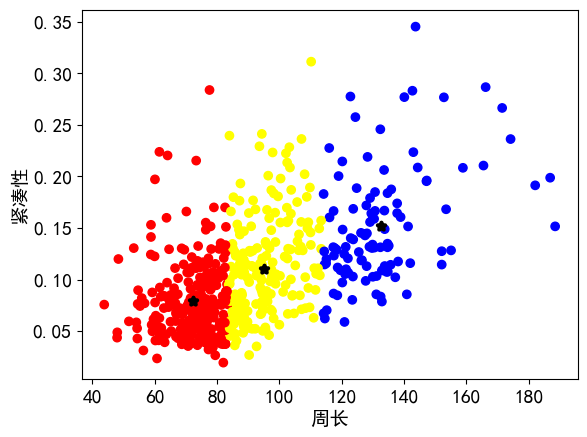

In [18]:
plt.rcParams['font.size'] = 14
colors=np.array(['red','blue','yellow','green'])
plt.scatter(df['周长'],df['紧凑型'],c=colors[df['cluster']])
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],linewidths=3,marker='*',s=30,c='black')
plt.xlabel('周长')
plt.ylabel('紧凑性')

In [19]:
km3=KMeans(n_clusters=3).fit(df[['周长','凹陷']])
km4=KMeans(n_clusters=2).fit(df[['周长','凹陷']])

D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
km3.labels_

array([0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0,
       0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0,

In [20]:
df['cluster3']=km3.labels_
df['cluster4']=km4.labels_
df.sort_values('cluster3')

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster3,cluster4
284,8912284,2,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127,2,0,0,0
441,909445,1,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,...,0.14360,0.4122,0.50360,0.17390,0.2500,0.07944,2,1,0,1
177,87281702,1,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,...,0.14150,0.4667,0.58620,0.20350,0.3054,0.09519,2,1,0,1
439,909410,2,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710,2,0,0,0
438,909231,2,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,...,0.11180,0.1141,0.04753,0.05890,0.2513,0.06911,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,887549,1,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.09333,...,0.15220,0.2945,0.37880,0.16970,0.3151,0.07999,1,1,2,1
156,8711202,1,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,...,0.14180,0.3498,0.35830,0.15150,0.2463,0.07738,1,1,2,1
256,88649001,1,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,...,0.12810,0.5329,0.42510,0.19410,0.2818,0.10050,1,1,2,1
503,915143,1,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,...,0.11990,0.3625,0.37940,0.22640,0.2908,0.07277,1,1,2,1


In [21]:
cluster3_centers=km3.cluster_centers_
cluster3_center_2=km4.cluster_centers_
df.groupby('cluster3').mean()

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,面积.2,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster4
cluster3,,,,,,,,,,,,,,,,,,,,,
0,2.417077e+07,1.543269,14.565433,19.526635,94.951346,659.749038,0.096101,0.109993,0.092132,0.050910,...,872.342308,0.132829,0.289694,0.310801,0.128363,0.296857,0.085686,2.0,0.245192,0.245192
1,2.833942e+07,1.960474,11.257862,18.078103,72.213834,393.547036,0.094588,0.079513,0.044882,0.023302,...,479.986561,0.129564,0.181292,0.162592,0.069348,0.277196,0.081978,0.0,0.000000,0.000000
2,4.707574e+07,1.009259,20.005370,21.671389,132.503704,1257.747222,0.101012,0.151619,0.185260,0.105096,...,1834.888889,0.138050,0.356978,0.454563,0.194134,0.307186,0.085203,1.0,1.000000,1.000000


In [22]:
df.groupby('cluster4').mean()

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,面积.2,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster3
cluster4,,,,,,,,,,,,,,,,,,,,,
0,2.532920e+07,1.851220,12.318632,18.460098,79.433366,475.784634,0.094426,0.087611,0.056603,0.030715,...,594.386341,0.129390,0.213712,0.204016,0.086575,0.281354,0.082811,0.765854,0.0,0.617073
1,4.337485e+07,1.050314,18.791132,21.428742,124.293711,1116.730818,0.101348,0.147480,0.171820,0.095861,...,1618.574843,0.140048,0.358835,0.447980,0.186889,0.312565,0.086873,1.320755,1.0,1.358491


In [23]:
cluster3_centers

array([[9.49513462e+01, 9.21323510e-02],
       [7.22138340e+01, 4.48821411e-02],
       [1.32503704e+02, 1.85260185e-01]])

Text(0, 0.5, '凹陷')

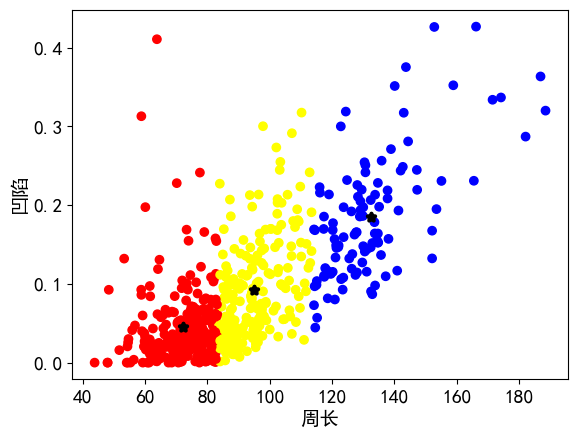

In [24]:
plt.rcParams['font.size'] = 14
colors=np.array(['red','blue','yellow','green'])
plt.scatter(df['周长'],df['凹陷'],c=colors[df['cluster']])
plt.scatter(cluster3_centers[:,0],cluster3_centers[:,1],linewidths=3,marker='*',s=30,c='black')
plt.xlabel('周长')
plt.ylabel('凹陷')

In [25]:
km5=KMeans(n_clusters=3).fit(df[['周长','面积']])
km6=KMeans(n_clusters=2).fit(df[['周长','面积']])

D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
km5.labels_

array([2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1,

In [27]:
df['cluster5']=km5.labels_
df.sort_values('cluster5')

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster3,cluster4,cluster5
284,8912284,2,12.89,15.70,84.08,516.6,0.07818,0.09580,0.111500,0.03390,...,0.23170,0.33440,0.10170,0.1999,0.07127,2,0,2,1,0
354,901011,2,11.14,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.01471,...,0.12560,0.12010,0.03922,0.2576,0.07018,1,0,1,1,0
350,899187,2,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,0.06476,0.03046,0.04262,0.2731,0.06825,1,0,1,1,0
349,899147,2,11.95,14.96,77.23,426.7,0.11580,0.12060,0.011710,0.01787,...,0.18850,0.03122,0.04766,0.3124,0.07590,1,0,1,1,0
348,898690,2,11.47,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.02322,...,0.11200,0.09823,0.06548,0.2851,0.08763,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,89382601,2,14.61,15.69,92.68,664.9,0.07618,0.03515,0.014470,0.01877,...,0.07087,0.04746,0.05813,0.2530,0.05695,2,0,2,1,2
75,8610404,1,16.07,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.06638,...,0.20450,0.28290,0.15200,0.2650,0.06387,2,1,2,0,2
167,8712729,1,16.78,18.80,109.30,886.3,0.08865,0.09182,0.084220,0.06576,...,0.21190,0.23180,0.14740,0.2810,0.07228,2,1,2,0,2
72,859717,1,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.07944,...,0.73940,0.65660,0.18990,0.3313,0.13390,2,1,0,0,2


In [28]:
cluster5_centers=km5.cluster_centers_

In [29]:
df.groupby('cluster5').mean()

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,平滑度.2,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster3,cluster4
cluster5,,,,,,,,,,,,,,,,,,,,,
0,2.741733e+07,1.905605,11.818640,18.264543,76.035015,435.482596,0.094670,0.084157,0.050385,0.026987,...,0.129973,0.201998,0.186740,0.079277,0.280071,0.082971,1.241888,0.000000,1.253687,1.000000
1,4.646080e+07,1.000000,20.660482,22.154940,136.998795,1338.578313,0.101570,0.154593,0.196434,0.111134,...,0.139018,0.363742,0.474495,0.202514,0.309239,0.084653,0.000000,1.000000,0.000000,0.000000
2,2.810103e+07,1.340136,15.762517,20.035850,103.289864,774.838776,0.097316,0.122513,0.116614,0.064370,...,0.134139,0.312985,0.355015,0.146444,0.302329,0.085794,1.687075,0.517007,1.659864,0.482993


In [30]:
cluster5_centers

array([[  76.07488235,  435.98558824],
       [ 136.99879518, 1338.57831325],
       [ 103.38369863,  775.99178082]])

Text(0, 0.5, '面积')

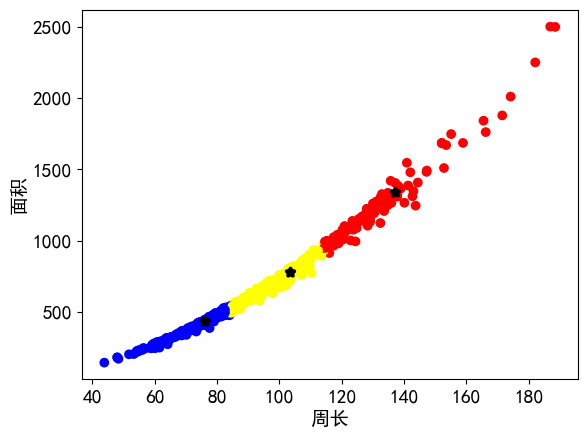

In [31]:
plt.rcParams['font.size'] = 14
colors=np.array(['red','blue','yellow','green'])
plt.scatter(df['周长'],df['面积'],c=colors[df['cluster']])
plt.scatter(cluster5_centers[:,0],cluster5_centers[:,1],linewidths=3,marker='*',s=30,c='black')
plt.xlabel('周长')
plt.ylabel('面积')

In [32]:
km6=KMeans(n_clusters=3).fit(df[['周长','平滑度']])

D:\software\Python3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
km6.labels_

array([1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1,

In [34]:
df['cluster6']=km6.labels_
df.sort_values('cluster6')

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster3,cluster4,cluster5,cluster6
284,8912284,2,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,...,0.33440,0.10170,0.1999,0.07127,2,0,2,1,0,0
149,869931,2,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,...,0.15640,0.06019,0.2350,0.07014,2,0,2,1,0,0
392,903507,1,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.091130,...,0.55530,0.21210,0.3187,0.10190,2,1,2,0,2,0
387,902976,2,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,...,0.10910,0.04537,0.2542,0.06623,2,0,2,1,0,0
154,8711002,2,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,...,0.30090,0.09722,0.3849,0.08633,2,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,87127,2,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.016980,...,0.10470,0.04603,0.2090,0.07699,1,0,1,1,0,2
170,87139402,2,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.037000,...,0.12420,0.09391,0.2827,0.06771,1,0,1,1,0,2
367,9011495,2,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.020270,...,0.24130,0.08829,0.3218,0.07470,1,0,1,1,0,2
159,871149,2,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,0.01854,0.03953,0.2738,0.07685,1,0,1,1,0,2


In [35]:
cluster6_centers=km6.cluster_centers_

In [36]:
df.groupby('cluster6').mean()

,卡号,诊断,半径_平均值,质地,周长,面积,平滑度,紧凑型,凹陷,凹点,...,紧凑性.1,凹陷.2,凹点.2,对称.2,分型维度.1,cluster,cluster2,cluster3,cluster4,cluster5
cluster6,,,,,,,,,,,,,,,,,,,,,
0,2.417077e+07,1.543269,14.565433,19.526635,94.951346,659.749038,0.096101,0.109993,0.092132,0.050910,...,0.289694,0.310801,0.128363,0.296857,0.085686,1.980769,0.245192,2.0,0.754808,1.173077
1,4.707574e+07,1.009259,20.005370,21.671389,132.503704,1257.747222,0.101012,0.151619,0.185260,0.105096,...,0.356978,0.454563,0.194134,0.307186,0.085203,0.037037,1.000000,0.0,0.000000,1.231481
2,2.833942e+07,1.960474,11.257862,18.078103,72.213834,393.547036,0.094588,0.079513,0.044882,0.023302,...,0.181292,0.162592,0.069348,0.277196,0.081978,1.000000,0.000000,1.0,1.000000,0.000000


In [37]:
cluster6_centers

array([[9.49513462e+01, 9.61013462e-02],
       [1.32503704e+02, 1.01011759e-01],
       [7.22138340e+01, 9.45875494e-02]])

Text(0, 0.5, '平滑度')

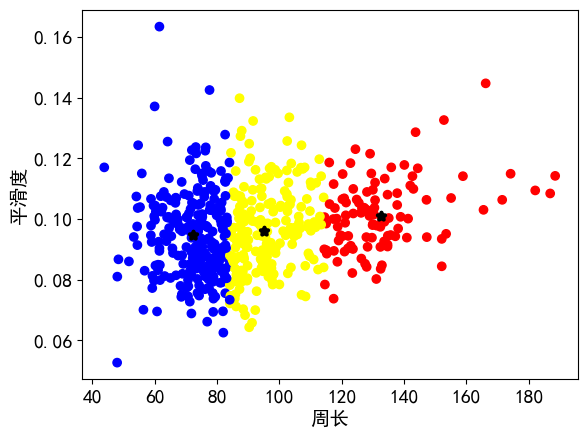

In [38]:
plt.rcParams['font.size'] = 14
colors=np.array(['red','blue','yellow','green'])
plt.scatter(df['周长'],df['平滑度'],c=colors[df['cluster']])
plt.scatter(cluster6_centers[:,0],cluster6_centers[:,1],linewidths=3,marker='*',s=30,c='black')
plt.xlabel('周长')
plt.ylabel('平滑度')

Text(0.5, 0.98, 'cluster')

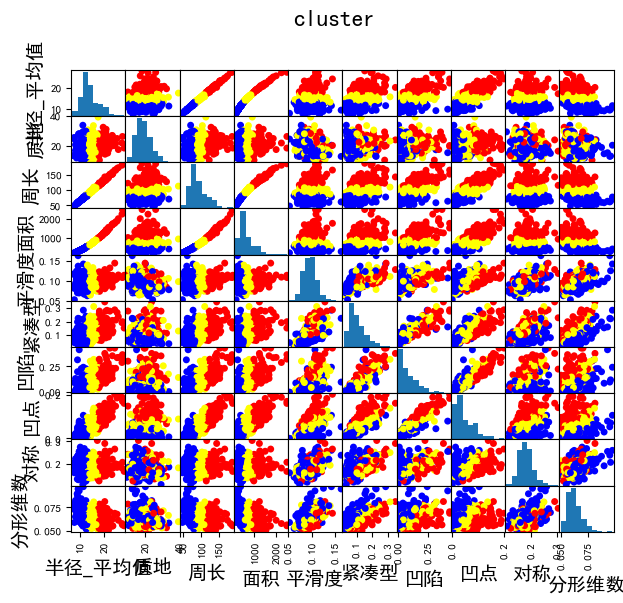

In [39]:
scatter_matrix(df[['半径_平均值','质地','周长','面积','平滑度','紧凑型','凹陷','凹点','对称','分形维数']],s=100,alpha=1,c=colors[df['cluster']],figsize=(7,6))
plt.suptitle('cluster')